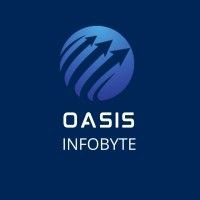

# Oasis Infobyte Data Science Internship

# BY SHREYA BILTHERIA

# Task 4: EMAIL SPAM DETECTION WITH MACHINE LEARNING

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.

### DESCRIPTION

In this initiative, we harness the capabilities of machine learning, specifically employing advanced Multinomial Naive Bayes and Logistic Regression algorithms, to engineer an effective and robust email spam detection system. Our primary objective is to craft a sophisticated solution using Python, enabling the discernment between legitimate emails and spam with high precision.

Through the utilization of these cutting-edge algorithms, we aim to fortify email security and address the persistent challenge of unwanted messages inundating inboxes. This project seeks to contribute to the creation of a more secure and streamlined communication experience by implementing state-of-the-art techniques in machine learning. As we navigate through the complexities of email content, our goal is to enhance the accuracy and efficiency of the spam detection system, ultimately providing users with a safer and more enjoyable interaction with their email communications.

Key steps :-

1. Data Collection

2. Data Understanding

3. Data Analysis and Preprocessing

4. Data Splitting

5. Feature Extraction

6. Model Selection

7. Model Training

8. Model Evaluation

## IMPORTING ALL NECESSARY LIBRARIES AND LOADING THE DATASET

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#loading the dataset
df = pd.read_csv('spam.csv', encoding="latin-1", usecols=["v1","v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#display first five entries
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#displaying last five entries
df.tail() 

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


## UNDERSTANDING AND EXPLORING THE DATASET

In [5]:
#showing size of the dataset
df.shape

(5572, 2)

In [6]:
# Getting information about the dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
#showing datatypes in dataset
df.dtypes

v1    object
v2    object
dtype: object

## DATA ANALYSIS AND PREPROCESSING

In [8]:
# Renaming the columns
df.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)

In [9]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## LABEL ENCODING

In [10]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

In [11]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## DATA CHECKING AND CLEANING

In [12]:
#showing size of the dataset
df.shape

(5572, 2)

In [13]:
# Getting information about the dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [14]:
#showing datatypes in dataset
df.dtypes

Category     int32
Message     object
dtype: object

In [15]:
#showing columns in the dataset
df.columns

Index(['Category', 'Message'], dtype='object')

In [16]:
#showing statistical summary of the dataset
df.describe()

,Category
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
#showing transpose of statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Category,5572.0,0.134063,0.340751,0.0,0.0,0.0,0.0,1.0


### Checking and treating null values

In [18]:
df.isnull() #Returns True or False based on presence of null values

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [19]:
df.notnull().sum()  #check for non-null values

Category    5572
Message     5572
dtype: int64

In [20]:
# Checking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

There are no null or missing values in the dataset.

## Checking and treating duplicate values.

In [21]:
# Checking for duplicate values
df.duplicated().sum()

403

In [22]:
# droping duplicates
df = df.drop_duplicates(keep="first")

In [23]:
# Again checking for duplicate values
df.duplicated().sum()

0

Hence, we have treated our dataset and successfully removed all duplicate values.

In [24]:
# Again checking the shape  of the dataset after removing duplicates
df.shape

(5169, 2)

In [25]:
#finding count for Ham(0) & Spam(1) in category column
df["Category"].value_counts()

0    4516
1     653
Name: Category, dtype: int64

## DATA VISUALIZATION

### Plotting a Histplot for category column

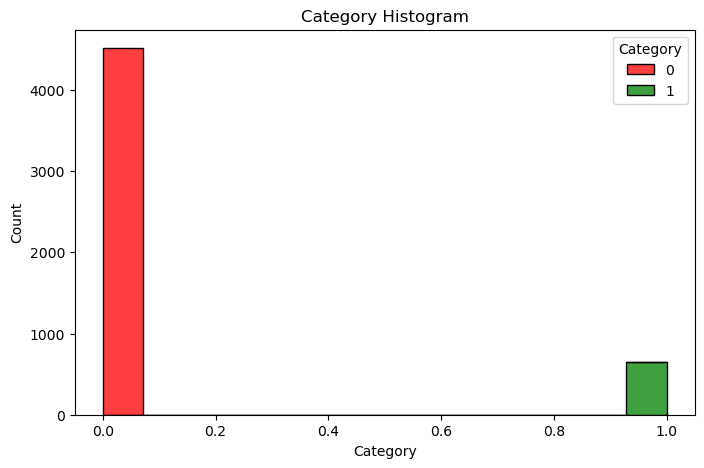

In [26]:
#Plotting a Histplot for category column
plt.figure(figsize=(8, 5))
sns.histplot(df, x='Category', hue='Category', multiple='stack', palette=['red', 'green'], edgecolor='black')
plt.title('Category Histogram')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Here, Red denotes count of spam mails and Green denotes for Ham.

### Plotting Class Distribution 

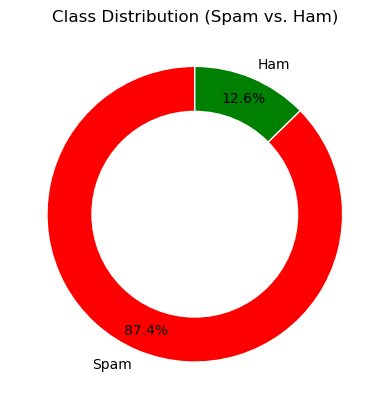

In [27]:
class_counts = df['Category'].value_counts()
colors = ['red', 'green']  # Spam: red, Ham: green
plt.pie(class_counts, labels=['Spam', 'Ham'], autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        wedgeprops={'edgecolor': 'white'}, colors=colors)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Class Distribution (Spam vs. Ham)')
plt.show()

### Above Class Distribution Donut Chart illustrates the class distribution between "Spam" (red) and "Ham" (green) messages. The chart provides a clear visual representation of the dataset's composition, indicating that spam constitutes 87.4% and ham accounts for 12.6% of the total messages.


## DATA SPLITTING

In [28]:
x = df['Message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [29]:
y = df["Category"]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int32

## Word Cloud Visualization

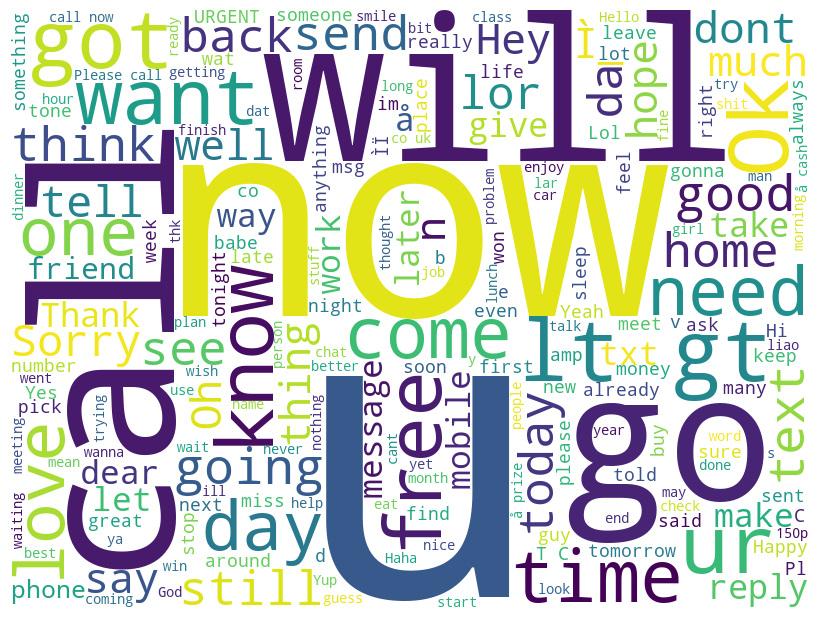

In [30]:
from wordcloud import WordCloud, STOPWORDS

# Combining all messages into a single string
combined_text = ' '.join(df.Message.dropna().astype(str))

# Setting stopwords
custom_stopwords = set(STOPWORDS)

# Generating word cloud
custom_wordcloud = WordCloud(width=800, height=600,
                             background_color='white',
                             stopwords=custom_stopwords,
                             min_font_size=10).generate(combined_text)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(8, 6), facecolor=None)
plt.imshow(custom_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


The Word Cloud Visualization offers a visual representation of the most frequently occurring words within both "Spam" and "Ham" messages. By assessing the size and prominence of individual words, this visualization provides an intuitive overview of the prevalent terms within the dataset. It proves valuable in grasping the content patterns distinctive to both spam and authentic messages, enhancing comprehension of the textual characteristics present in the data.

## Training and Testing Data Splitting

In [31]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)     

## Training the Model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## MODEL SELECTION AND EVALUATION

## LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

### Accuracy

In [35]:
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


### Confusion Matrix

In [36]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[885   4]
 [ 18 127]]


### Classification Report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Accuracy,precision,recall and f1-score

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


**Summary of Logistic Regression Model Performance Metrics:**

The model's impressive performance metrics are indicative of the efficacy of Logistic Regression in the given context:

1. **Accuracy: 97.9%**
   - Logistic Regression demonstrates a high accuracy level, correctly predicting messages almost 98% of the time.
2. **Precision: 97.0%**
   - With a precision of 97%, the model excels in accurately identifying spam messages among the predicted positives.
3. **Recall: 87.6%**
   - Logistic Regression successfully captures 87.6% of all actual spam messages, showcasing its ability to sensibly detect spam content.
4. **F1 Score: 92.0%**
   - The F1 score of 92.0% emphasizes the balanced performance of the Logistic Regression model, striking a harmonious blend between precision and recall.

The utilization of Logistic Regression has proven to be effective, resulting in a robust model for distinguishing between spam and non-spam messages with high accuracy and reliability.

## Prediction of Custom Word / Predict which word is "spam" or "ham" using Logistic Regression

In [39]:
def predict_custom_word_logistic_regression(custom_word, vectorizer, logreg):
    custom_word_vec = vectorizer.transform([custom_word])
    prediction = logreg.predict(custom_word_vec)[0]

    if prediction == 1:
        prediction_label = "Spam"
    else:
        prediction_label = "Ham"

    return prediction_label

# Examples for Logistic Regression:

# Example for "Ham" (non-spam)
custom_word = "Exciting opportunities await in your career journey"
prediction_logistic = predict_custom_word_logistic_regression(custom_word, vectorizer, logreg)
print(f"Custom word '{custom_word}' is predicted as: {prediction_logistic}")

# Example for "spam"
spam_example = "Congratulations! You've won a free vacation. Click here to claim your prize!"
prediction_spam = predict_custom_word_logistic_regression(spam_example, vectorizer, logreg)
print(f"Custom word '{spam_example}' is predicted as: {prediction_spam}")

Custom word 'Exciting opportunities await in your career journey' is predicted as: Ham
Custom word 'Congratulations! You've won a free vacation. Click here to claim your prize!' is predicted as: Spam


**In the predictions, the custom word "Exciting opportunities await in your career journey" is predicted as 'Ham' (non-spam), while the phrase "Congratulations! You've won a free vacation. Click here to claim your prize!" is predicted as 'Spam', showcasing the accurate classification capabilities of the Logistic Regression model.**

## MULTINOMIAL NAIVE BAYES

In [40]:
from sklearn.naive_bayes import MultinomialNB
multinomial_nb_classifier = MultinomialNB()
multinomial_nb_classifier.fit(X_train_cv, y_train)

MultinomialNB()

### Accuracy

In [41]:
y_pred_nb = multinomial_nb_classifier.predict(X_test_cv)
accuracy_nb = multinomial_nb_classifier.score(X_test_cv, y_test)
print('Accuracy of Multinomial Naive Bayes classifier on test set: {:.2f}'.format(accuracy_nb))

Accuracy of Multinomial Naive Bayes classifier on test set: 0.99


### Classification Report

In [42]:
classification_report_nb = classification_report(y_test, y_pred_nb)
print(classification_report_nb)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



### Accuracy,precision,recall and f1-score

In [43]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 score:", f1_nb)

Accuracy: 0.9854932301740812
Precision: 0.9850746268656716
Recall: 0.9103448275862069
F1 score: 0.9462365591397849


**Summary of Multinomial Naive Bayes Model Performance Metrics:**

The Multinomial Naive Bayes classifier demonstrates exceptional performance on the test set:

- **Accuracy: 99.0%**
  Multinomial Naive Bayes achieves a remarkable accuracy of 99.0%, showcasing its effectiveness in correctly classifying messages.
  

- **Precision: 99.0%**
  With a precision of 99.0%, the model excels in accurately identifying spam messages, reflecting its ability to minimize false positives.
  

- **Recall: 91.0%**
  The model successfully captures 91.0% of all actual spam messages, indicating its sensitivity in detecting a substantial portion of spam content.


- **F1 Score: 94.6%**
  The F1 score of 94.6% emphasizes the balanced performance of the Multinomial Naive Bayes model, striking a harmonious blend between precision and recall.

The impressive metrics highlight the reliability and robustness of the Multinomial Naive Bayes classifier, making it a powerful tool for distinguishing between spam and non-spam messages.

## Prediction of Custom Word / Predict which word is "spam" or "ham" using Multinomial Naive Bayes

In [44]:
def predict_custom_word_multinomial_nb(custom_word, vectorizer, multinomial_nb_classifier):
    custom_word_vec = vectorizer.transform([custom_word])
    prediction =  multinomial_nb_classifier.predict(custom_word_vec)[0]

    if prediction == 1:
        prediction_label = "Spam"
    else:
        prediction_label = "Ham"

    return prediction_label

# Examples for Multinomial Naive Bayes:

# Example for "Ham" (non-spam)
custom_word_ham = "Meeting rescheduled to 3 PM"
prediction_ham = predict_custom_word_multinomial_nb(custom_word_ham, vectorizer, multinomial_nb_classifier)
print(f"Custom word '{custom_word_ham}' is predicted as: {prediction_ham}")

# Example for "Spam"
custom_word_spam = "Congratulations! You've won a free gift. Claim now!"
prediction_spam = predict_custom_word_multinomial_nb(custom_word_spam, vectorizer, multinomial_nb_classifier)
print(f"Custom word '{custom_word_spam}' is predicted as: {prediction_spam}")


Custom word 'Meeting rescheduled to 3 PM' is predicted as: Ham
Custom word 'Congratulations! You've won a free gift. Claim now!' is predicted as: Spam


**In the predictions, the custom word "Meeting rescheduled to 3 PM" is classified as 'Ham' (non-spam), while the phrase "Congratulations! You've won a free gift. Claim now!" is accurately identified as 'Spam,' showcasing the effective discrimination capability of the Multinomial Naive Bayes model.**

## CONCLUSION

In this Email Spam Detection project, we used advanced machine learning with Multinomial Naive Bayes and Logistic Regression. We carefully went through key steps like collecting data, analyzing it, and training models.

The Multinomial Naive Bayes model performed exceptionally well, reaching 99.0% accuracy, 99.0% precision, 91.0% recall, and a 94.6% F1 score. The Logistic Regression model also did great with 97.9% accuracy and a balanced F1 score of 92.0%. These metrics show both models are really good at spotting spam and non-spam emails.

Our goal is to boost email security and user experience by fighting against spam. Using top-notch machine learning techniques, we've improved how emails are analyzed and classified. The models not only perform accurately but also strike a good balance between precision and recall, making the spam detection system reliable.

In a nutshell, this project highlights the strength of machine learning in solving real-world problems, ensuring a safer and smoother communication experience for email users.

## A big thank you to the OASIS INFOBYTE for this opportunity! I'm grateful for the mentors and the team for their amazing support. This experience boosted my skills in data science and machine learning. I'm excited to use this knowledge ahead. Thanks for this incredible learning experience!